In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
print(" Q.1: Import Data and Check Null Values, Column Info, and Descriptive Statistics")
print("_________________________________________________________________________________")
# Load dataset
df = pd.read_csv('Instagram-Reach.csv')
print("____________________________________________")
# Null values
print(df.isnull().sum())
print("____________________________________________")
# Get col information
print(df.info())
print("____________________________________________")
# Display statistics
print(df.describe())
print("____________________________________________")

 Q.1: Import Data and Check Null Values, Column Info, and Descriptive Statistics
_________________________________________________________________________________
____________________________________________
Date               0
Instagram reach    0
dtype: int64
____________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             365 non-null    object
 1   Instagram reach  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB
None
____________________________________________
       Instagram reach
count       365.000000
mean      50474.712329
std       30051.787552
min        7620.000000
25%       25070.000000
50%       43987.000000
75%       68331.000000
max      161998.000000
____________________________________________


In [14]:
print(" Q.2: Convert the Date Column into Datetime Datatype")
print("_________________________________________________________________________________")
# Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
# Check the conversion
print(df.head())
print("_________________________________________")
print(df.tail())
print("_________________________________________")

 Q.2: Convert the Date Column into Datetime Datatype
_________________________________________________________________________________
        Date  Instagram reach
0 2022-04-01             7620
1 2022-04-02            12859
2 2022-04-03            16008
3 2022-04-04            24349
4 2022-04-05            20532
_________________________________________
          Date  Instagram reach
360 2023-03-27            15622
361 2023-03-28            18645
362 2023-03-29            41238
363 2023-03-30            50490
364 2023-03-31            22014
_________________________________________


 Q.3: Analyze the Trend of Instagram Reach Over Time Using a Line Chart
____________________________________________________________________________________________________________________________________________


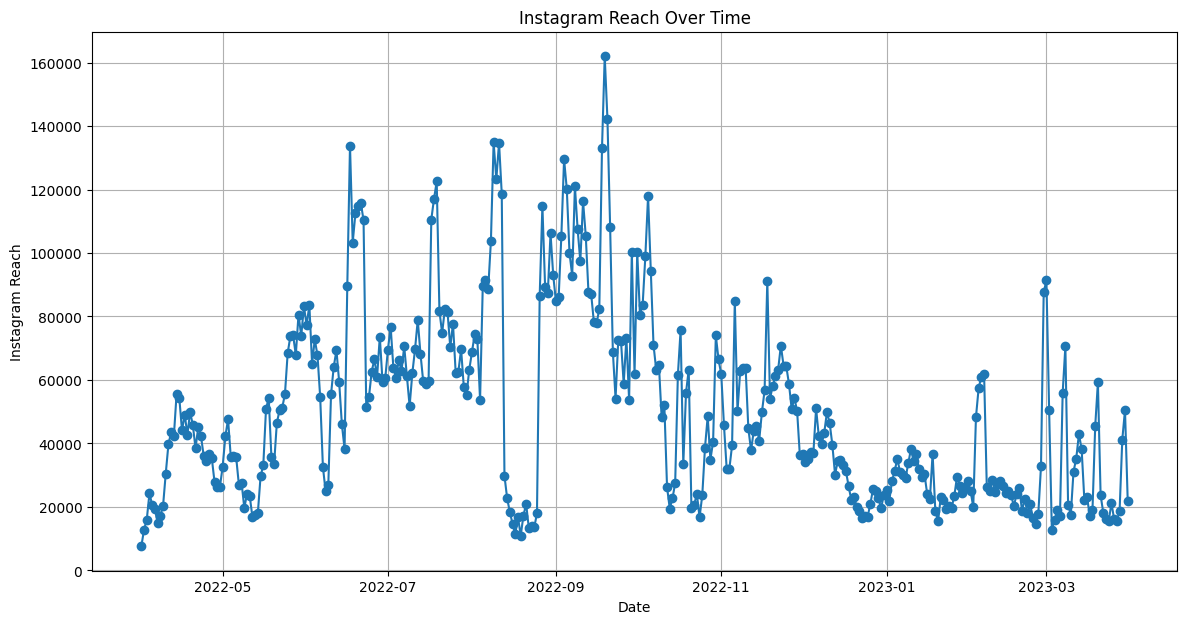

In [22]:
print(" Q.3: Analyze the Trend of Instagram Reach Over Time Using a Line Chart")
print("____________________________________________________________________________________________________________________________________________")
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Instagram reach'], marker='o', linestyle='-')
plt.title('Instagram Reach Over Time')
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.grid(True)
plt.show()

 Q.4: Analyze Instagram Reach for Each Day Using a Bar Chart
______________________________________________________________________________________________________________________________________


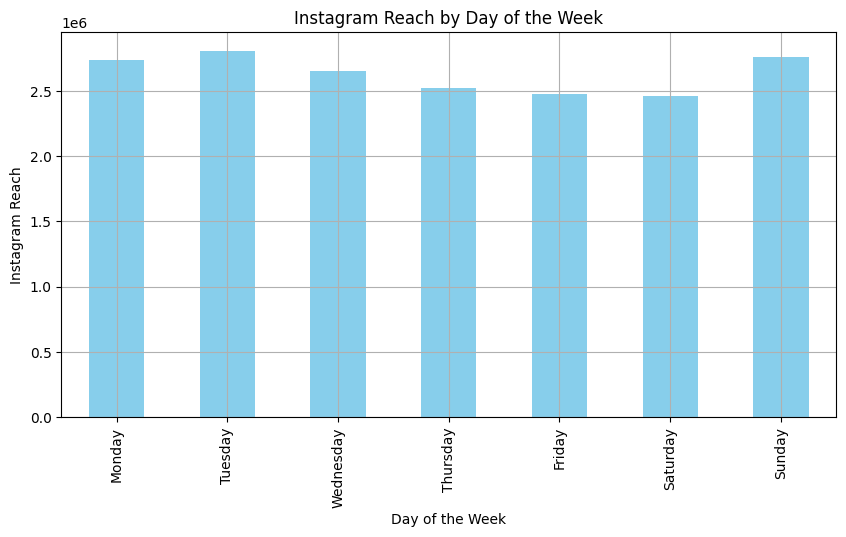

In [21]:
print(" Q.4: Analyze Instagram Reach for Each Day Using a Bar Chart")
print("______________________________________________________________________________________________________________________________________")
df['Day'] = df['Date'].dt.day_name()

#Aggregate reach by day of the week
reach_day = df.groupby('Day')['Instagram reach'].sum()

# Sort days of the week
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
reach_day = reach_by_day.reindex(order_days)

plt.figure(figsize=(10, 5))
reach_day.plot(kind='bar', color='skyblue')
plt.title('Instagram Reach by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Instagram Reach')
plt.grid(True)
plt.show()


 Q.5: Analyze the Distribution of Instagram Reach Using a Box Plot
______________________________________________________________________________________________________________________________________


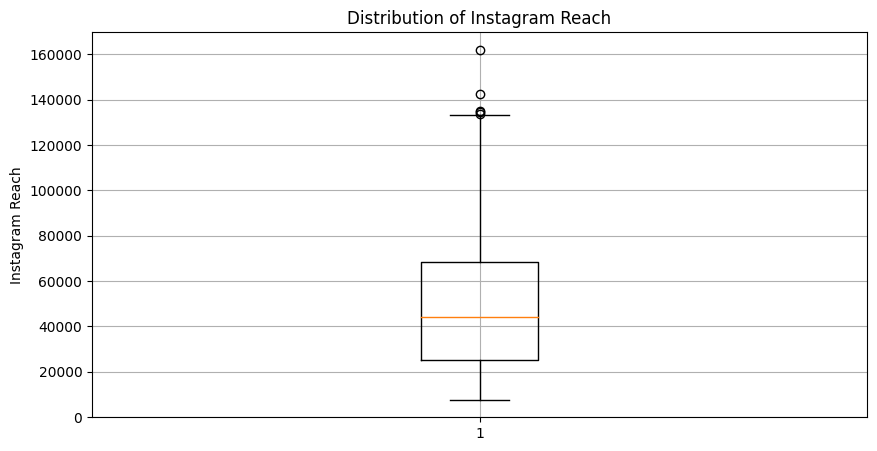

In [24]:
print(" Q.5: Analyze the Distribution of Instagram Reach Using a Box Plot")
print("______________________________________________________________________________________________________________________________________")
plt.figure(figsize=(10, 5))
plt.boxplot(df['Instagram reach'])
plt.title('Distribution of Instagram Reach')
plt.ylabel('Instagram Reach')
plt.grid(True)
plt.show()

In [26]:
print(" Q.6: Analyze Reach Based on the Days of the Week")
print("____________________________________________________________________________________________________")

stats_by_day = df.groupby('Day')['Instagram reach'].agg(['mean', 'median', 'std']).reindex(ordered_days)
print("______________________________________________")
print(stats_by_day)
print("______________________________________________")

 Q.6: Analyze Reach Based on the Days of the Week
____________________________________________________________________________________________________
______________________________________________
                   mean   median           std
Day                                           
Monday     52621.692308  46853.0  32296.071347
Tuesday    54030.557692  48786.0  32503.726482
Wednesday  51017.269231  42320.5  29047.869685
Thursday   48570.923077  39150.0  28623.220625
Friday     46666.849057  35574.0  29856.943036
Saturday   47374.750000  40012.0  27667.043634
Sunday     53114.173077  47797.0  30906.162384
______________________________________________


 Q.7: Create a Bar Chart to Visualize the Reach for Each Day of the Week
___________________________________________________________________________________________________________________________________________


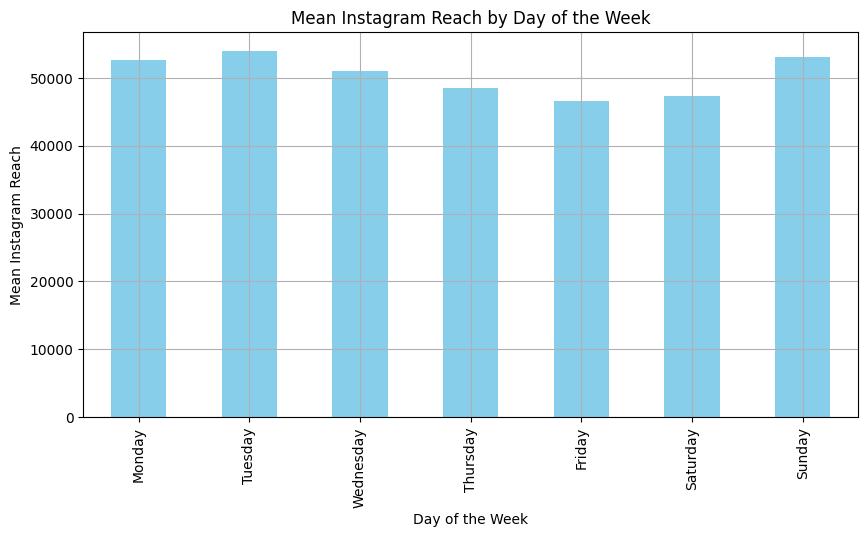

In [28]:
print(" Q.7: Create a Bar Chart to Visualize the Reach for Each Day of the Week")
print("___________________________________________________________________________________________________________________________________________")

plt.figure(figsize=(10, 5))
stats_by_day['mean'].plot(kind='bar', color='skyblue')
plt.title('Mean Instagram Reach by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Instagram Reach')
plt.grid(True)
plt.show()


Q.8: Check the Trends and Seasonal Patterns of Instagram Reach
____________________________________________________________________________________________________


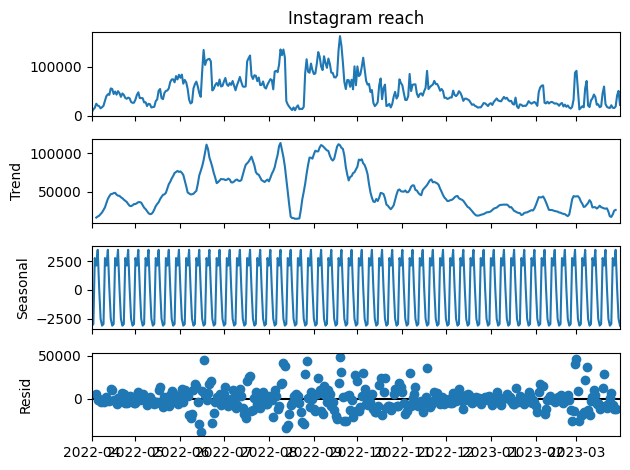

In [33]:
print("Q.8: Check the Trends and Seasonal Patterns of Instagram Reach")
print("____________________________________________________________________________________________________")
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(df.set_index('Date')['Instagram reach'], model='additive', period=7)
decomposition.plot()
plt.show()

 Q.9: Use the SARIMA Model to Forecast the Reach of the Instagram Account
_______________________________________________________________________________________________________________________________


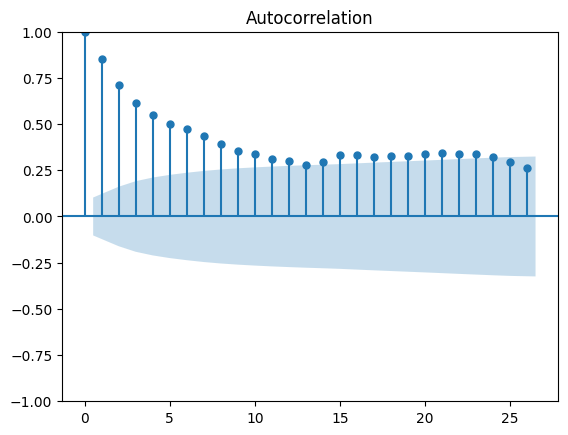

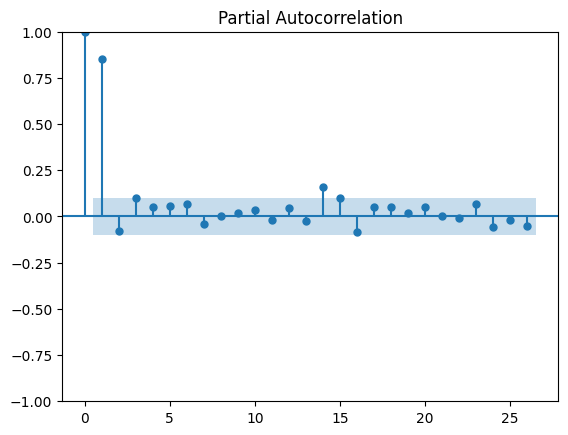

In [35]:
print(" Q.9: Use the SARIMA Model to Forecast the Reach of the Instagram Account")
print("_______________________________________________________________________________________________________________________________")
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#Plot ACF and PACF
plot_acf(df['Instagram reach'])
plot_pacf(df['Instagram reach'])
plt.show()



Q.8: Check the Trends and Seasonal Patterns of Instagram Reach
____________________________________________________________________________________________________________________________________________


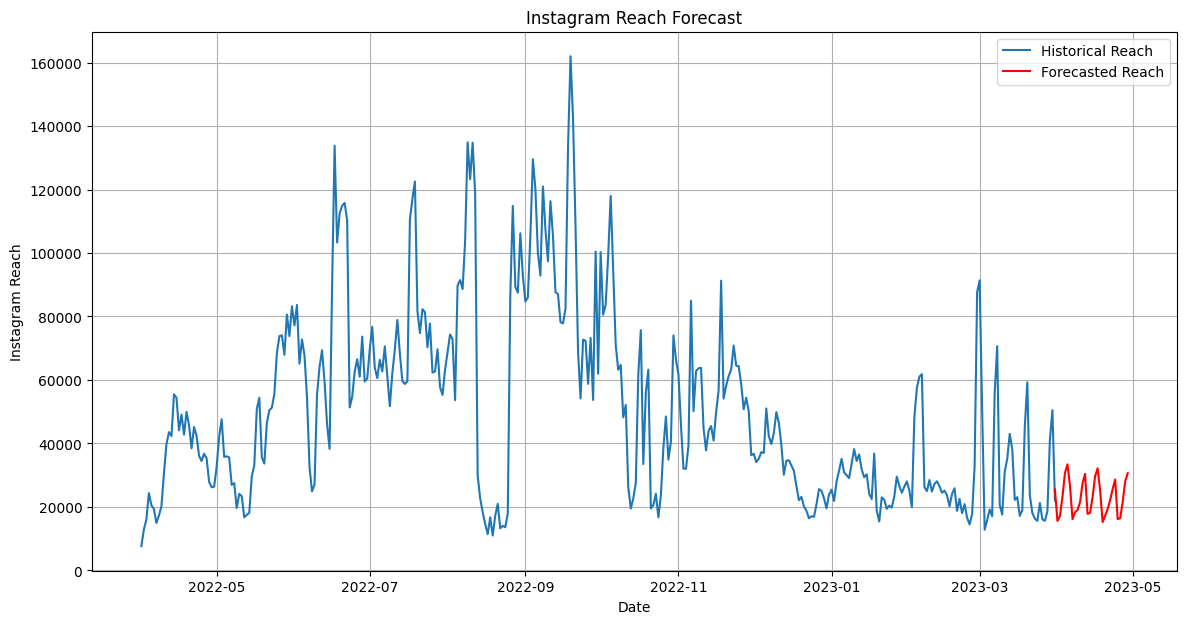

In [42]:
print("Q.8: Check the Trends and Seasonal Patterns of Instagram Reach")
print("____________________________________________________________________________________________________________________________________________")

from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import pandas as pd

p, d, q = 1, 1, 1  # ARIMAparameters 
P, D, Q, s = 1, 1, 1, 12  #Seasonal parameters 

model = SARIMAX(df['Instagram reach'], order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_model = model.fit(disp=False)

predictions = sarima_model.predict(start=len(df), end=len(df) + 29)

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Instagram reach'], label='Historical Reach')
plt.plot(pd.date_range(start=df['Date'].iloc[-1], periods=30, freq='D'), predictions, label='Forecasted Reach', color='red')
plt.title('Instagram Reach Forecast')
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.legend()
plt.grid(True)
plt.show()
